# Bloque 03 - Unidad 01: Aprendizaje Supervisado - Regresión y Clasificación

El aprendizaje supervisado implica entrenar un modelo usando datos etiquetados. En esta lección, nos enfocaremos en dos tipos principales de aprendizaje supervisado: la regresión y la clasificación. Los modelos de regresión predicen resultados continuos, mientras que los modelos de clasificación predicen etiquetas discretas. Los modelos que exploraremos incluyen la regresión lineal para tareas de regresión y la regresión logística para tareas de clasificación.

Los modelos de aprendizaje supervisado intentan encontrar patrones en los datos etiquetados que les permitan hacer predicciones sobre datos no vistos.


En este bloque y el siguiente vamos a usar Scikit-learn, una biblioteca de código abierto en Python ampliamente utilizada para el aprendizaje automático (machine learning). Ofrece herramientas eficientes para modelado predictivo, clasificación, regresión, clustering, reducción de dimensionalidad y selección de características. Scikit-learn está diseñado para ser fácil de usar, flexible y con una API coherente, lo que la convierte en una opción popular tanto para principiantes como para expertos.

La biblioteca incluye implementaciones optimizadas de algoritmos de machine learning como regresión lineal, regresión logística, árboles de decisión, máquinas de soporte vectorial (SVM), y métodos de ensamble como Random Forest y Gradient Boosting. Además, scikit-learn ofrece herramientas para el preprocesamiento de datos, validación cruzada y ajuste de hiperparámetros, lo que permite construir flujos de trabajo completos de machine learning de manera sencilla.

Documentación: https://scikit-learn.org/

Código Fuente: https://github.com/scikit-learn/scikit-learn

In [ ]:
import urllib.request
from pathlib import Path

import pandas as pd
import seaborn.objects as so
import sklearn


# Antes, scikit-learn trabajaba solamente con NumPy
# Esto permite que sus resultados sean DataFrames
sklearn.set_config(transform_output="pandas")


def download(url: str, /) -> Path:
    """Descarga la URL y devuelve un Path al archivo.

    Si ya existe, no lo vuelve a descargar.
    """
    filename = Path(url).name
    path = Path(filename)
    if not path.exists():
        urllib.request.urlretrieve(url, path)
    return path

## Regresión con Scikit-learn
Comencemos con un ejemplo muy simple de predicción de la nota de un examen basado en solo una característica: la cantidad de horas de estudio.

In [ ]:
# fmt: off
df = pd.DataFrame(
    {
        "Horas de estudio": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # característica
        "Puntuación examen": [50, 55, 65, 70, 70, 75, 80, 85, 90, 95],  # objetivo
    }
)
# fmt: on

La mayoría de los algoritmos de Scikit-Learn operan sobre
- una matriz $X$ de características (*features*) y
- un vector $y$ de objetivos (*targets*)

y "aprenden" una función $\hat{y} = f(X)$ tal que $\hat{y} \approx y$ bajo alguna métrica.

In [ ]:
features = ["Horas de estudio"]  # list[str]
target = "Puntuación examen"  # str

X = df[features]  # DataFrame
y = df[target]  # Series

In [ ]:
X

,Horas de estudio
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


La API de scikit-learn está separada en tres partes:

- la inicialización del modelo,
donde se pueden pasar diversos parámetros para configurarlo,
- el ajuste `.fit(X, y)`,
donde de "aprenden" los parámetros que mejor describen a los datos,
- la predicción `.predict(X)`,
donde se usa el modelo aprendido para predecir valores de `y` para nuevos datos.

Importamos e inicializamos una regresión lineal:

In [ ]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo

LinearRegression()

Entrenamos el modelo con los datos:

In [ ]:
modelo.fit(X, y)

LinearRegression()

*Fijate como se muestra distinto el objeto `LinearRegression` en Jupyter Notebook.*

Para la regresión lineal,
el modelo aprende la siguiente función:

$$ X \beta + \beta_0 \approx y $$

donde $\beta$ es un vector con un coeficiente para cada columna de $X$.

Se puede acceder a estos coeficientes así:

In [ ]:
print("β", modelo.coef_)
print("β₀", modelo.intercept_)

β [4.75757576]
β₀ 47.33333333333334


Predecimos valores a partir del modelo entrenado:

In [ ]:
df["Puntuación predicha"] = modelo.predict(X)
df.head()

,Horas de estudio,Puntuación examen,Puntuación predicha
0,1,50,52.090909
1,2,55,56.848485
2,3,65,61.606061
3,4,70,66.363636
4,5,70,71.121212


Visualicemos los datos y la predicción:

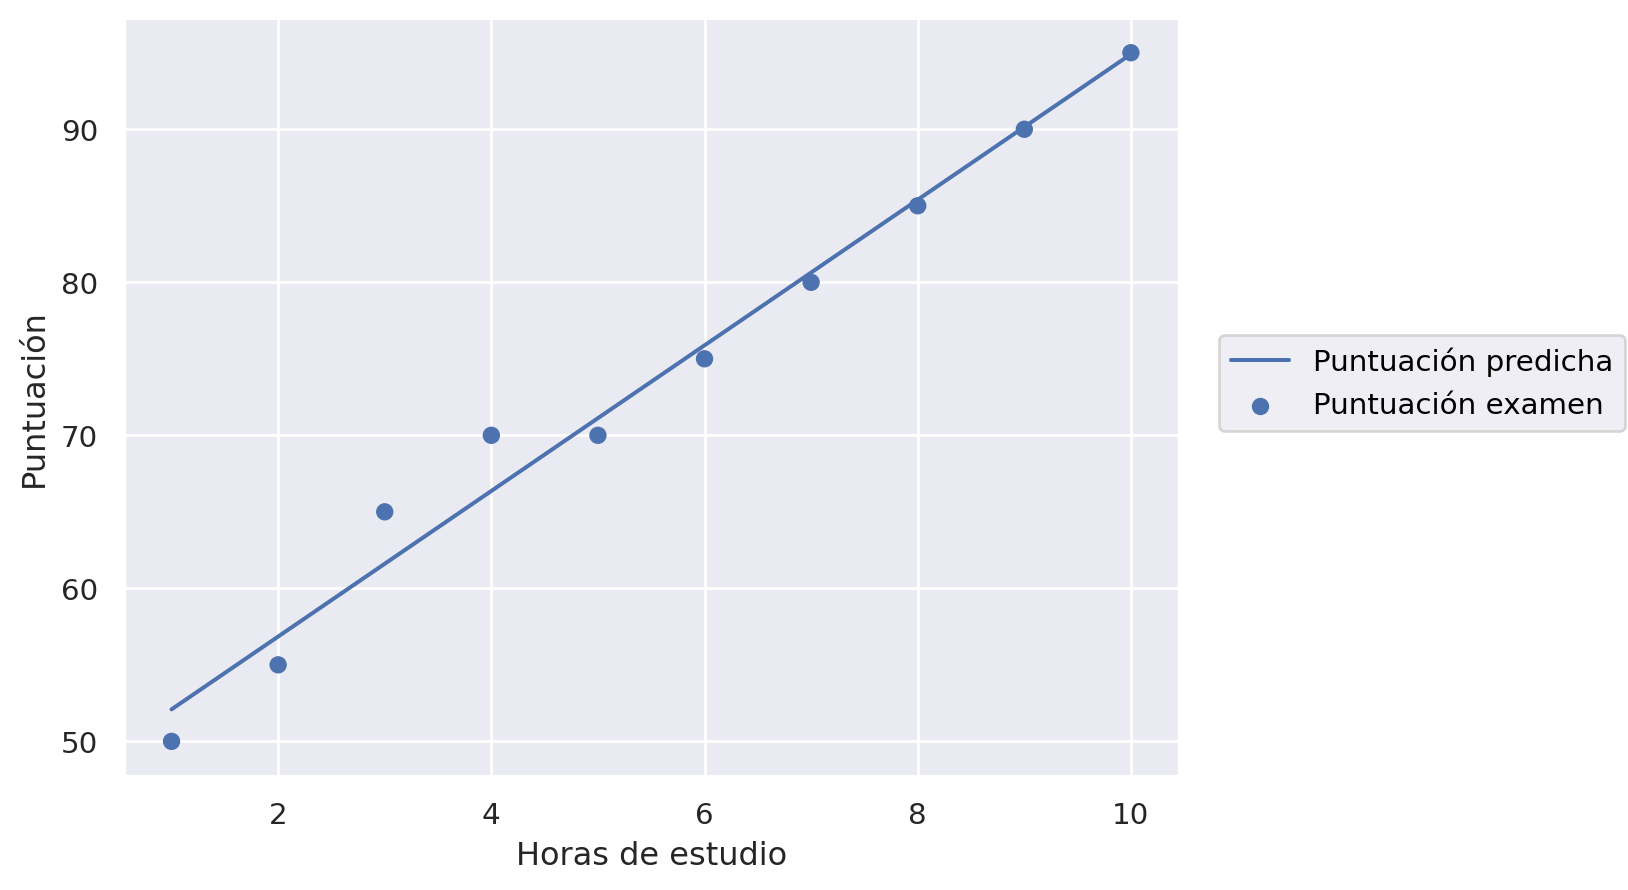

In [ ]:
(
    so.Plot(df, x="Horas de estudio")
    .add(so.Line(), y="Puntuación predicha", label="Puntuación predicha")
    .add(so.Dot(), y="Puntuación examen", label="Puntuación examen")
    .label(y="Puntuación")
)

**Para hacer**:

1. Leer la documentación de `LinearRegression` en Scikit-learn
y entender la diferencia entre crear el model, entrenar el modelo y usar el modelo para predecir.
2. Hacé una predición para 0, 0.5 y 1 horas de estudio.
¿Podés relacionar el resultado a los coeficientes $\beta$?
3. Calcular el `score` para estos datos. ¿Qué está calculando?
4. Agregá ruido normal a la puntuación y repetí el entrenamiento. ¿Cómo cambia el score?
5. ¿Qué pasa si querés usar un modelo no entrenado para realizar una predicción?

In [ ]:
horas_predichas = modelo.predict([[0], [0.5], [1]])
horas_predichas

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47.33333333, 49.71212121, 52.09090909])

In [ ]:
#calculemos las predicciones a mano con los coeficientes
horas_predichas = modelo.intercept_ + modelo.coef_ * [[0], [0.5], [1]]
horas_predichas

array([[47.33333333],
       [49.71212121],
       [52.09090909]])

In [ ]:
#calculamos el score
modelo.score(X, y)

0.9815235137179947

In [ ]:
import numpy as np
rng=np.random.default_rng()
y_ruido = y + rng.normal(scale=10, size=len(y))
y_ruido=pd.Series(y_ruido, name='Puntuación examen con ruido')
df['Puntuación examen con ruido'] = y_ruido


In [ ]:
modelo.fit(X, y_ruido)
df["Puntuación predicha con ruido"] = modelo.predict(X)

In [ ]:
modelo.score(X, y_ruido)

0.7514622822323315

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.predict(X)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Clasificación con Scikit-learn
Ahora veamos un ejemplo básico de clasificación donde clasificamos frutas en función de su peso y color. Para simplificar, asumamos que solo tenemos manzanas y naranjas.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Datos de ejemplo
df = pd.DataFrame(
    {
        "peso": [150, 160, 170, 180, 190],  # en gramos
        "color": [1, 1, 0, 0, 0],  # (1 para rojo, 0 para naranja)
        "fruta": [0, 0, 1, 1, 1],  # objetivo (0 para manzana, 1 para naranja)
    }
)

# Caracteristicas y objetivo
X = ...
y = ...

# Inicializar el modelo de regresión logística
logreg = LogisticRegression()

# Entrenar el modelo con los datos
...

# Predecir
...

# Visualizar
...

NameError: name 'pd' is not defined

**Para hacer**:

1. Leer la documentación de `LogisticRegression` en Scikit-learn. ¿Por qué sirve para clasificar?
2. Completa el código para
    - separar en características (*features*) y objetivos (*targets*)
    - entrenar el modelo
    - predecir
    - visualizar la regresión
3. Hacé una predición para una fruta de 155 gramos y color rojo.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Datos de ejemplo
df = pd.DataFrame(
    {
        "peso": [150, 160, 170, 180, 190],  # en gramos
        "color": [1, 1, 0, 0, 0],  # (1 para rojo, 0 para naranja)
        "fruta": [0, 0, 1, 1, 1],  # objetivo (0 para manzana, 1 para naranja)
    }
)

# Caracteristicas y objetivo
X = df[["peso", "color"]]
y = df["fruta"]

# Inicializar el modelo de regresión logística
logreg = LogisticRegression()

# Entrenar el modelo con los datos
logreg.fit(X, y)

# Predecir
df["fruta_predicha"] = logreg.predict(X)

# Visualizar
#como lo veo lindo?

In [ ]:
df

In [ ]:
fruta_a_clasificar = pd.DataFrame({"peso": [155], "color": [1]})
logreg.predict(fruta_a_clasificar)
#la clasifica como manzana

## Pre-procesamiento y *pipelines*

Por ahora,
usamos modelos de un solo paso.
Lo usual es tener que aplicar varios pasos de pre-procesamiento,
como alguna normalización,
antes de ajustar la regresión o clasificación.
Para esto, ya existe un modulo con ciertos pre-procesamientos comunes.

Por otro lado,
para combinar estos pasos de una manera cómoda y,
lo que es más importante,
correcta (tal que no metamos la pata),
se pueden combinar en un `Pipeline`.

Veamos estás dos cosas.

### Variante del dataset

Supongamos que en el dataset no viene pre-codificado `"rojo"` y `"naranja"` como `0` y `1`.

In [ ]:
df = pd.DataFrame(
    {
        "peso": [150, 160, 170, 180, 190],  # en gramos
        "color": ["rojo", "rojo", "naranja", "naranja", "naranja"],
        "fruta": [0, 0, 1, 1, 1],
    }
)

X = df[["peso", "color"]]
y = df["fruta"]

Si tratamos de entrenar el modelo de esta manera,
nos va a arrojar un error:

In [ ]:
LogisticRegression().fit(X, y)

ValueError: could not convert string to float: 'rojo'

Tenemos que codificarlos como números.

### Pre-procesamiento

En el módulo `preprocessing`,
scikit-learn incluye diversas transformaciones,
entre las que se incluyen algunos *encoders*.
Para este caso,
vamos a usar `OrdinalEncoder`:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoder.fit(X)
encoder.transform(X)

,peso,color
0,0.0,1.0
1,1.0,1.0
2,2.0,0.0
3,3.0,0.0
4,4.0,0.0


A diferencia de las regresiones o clasificaciones,
a las transformaciones se las ajusta `.fit`
y luego se las usa con el método `.transform`.

También hay un método `.fit_transform` que las aplica en secuencia
(y para ciertas transformaciones puede ser más rápido):

In [ ]:
OrdinalEncoder().fit_transform(X)

,peso,color
0,0.0,1.0
1,1.0,1.0
2,2.0,0.0
3,3.0,0.0
4,4.0,0.0


Hay un problema,
y es que está transformando también la columna `"peso"`.

Para transformar solo algunas columnas,
podemos usar un `ColumnTransformer`:

In [ ]:
from sklearn.compose import ColumnTransformer

ColumnTransformer(
    [
        (
            "category",  # nombre (prefijo)
            OrdinalEncoder(),  # transformación
            ["color"],  # columnas
        )
    ],
    # probar que hacen las siguientes lineas
    # remainder="passthrough",
    # verbose_feature_names_out=True,
).fit_transform(X)

,category__color
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


### Pipeline

Si quisieramos transformar y clasificar los datos,
podríamos hacer lo siguiente:

```python
X = df[features]
y = df[target]

X_trans = transform.fit(X).predict(X)
y_pred = classifier.fit(X_trans, y).predict(X_trans)
```

Si no lo hacemos la transformación (categoría a número),
nos arrojaba un error.
Pero hay transformaciones que van de números a números,
y si nos olvidamos,
no nos arroja ningún error.
También podría pasar que usemos `X_trans` para ajustar el clasificador,
pero después predigamos sobre datos `X` no transformados.

Estaría bueno que todos los pasos para usar el modelo
queden registrados de manera tal que no podamos olvidarnos de aplicarlos.
Esto se puede hacer con un `Pipeline`:

In [ ]:
from sklearn.pipeline import Pipeline

encoder = ColumnTransformer(
    [("category", OrdinalEncoder(), ["color"])],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

pipeline = Pipeline(
    [
        ("encoder", encoder),
        ("regression", LogisticRegression()),
    ]
)

pipeline

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category', OrdinalEncoder(),
                                                  ['color'])],
                                   verbose_feature_names_out=False)),
                ('regression', LogisticRegression())])

Un pipeline es una secuencia de transformaciones que (opcionalmente) termina con una regresión o clasificación.

Podemos acceder a sus componentes como si fuese una lista (con *indexing* y *slicing*):

In [ ]:
pipeline[0]

ColumnTransformer(remainder='passthrough',
                  transformers=[('category', OrdinalEncoder(), ['color'])],
                  verbose_feature_names_out=False)

Cuando llamamos a `pipeline.fit(X, y)`,
se encarga de llamar a todas las transformaciones `X = pipeline[i].fit_predict(X)`,
y finalmente al último paso `pipeline[-1].fit(X, y)`:

In [ ]:
pipeline.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('category', OrdinalEncoder(),
                                                  ['color'])],
                                   verbose_feature_names_out=False)),
                ('regression', LogisticRegression())])

De la misma manera,
con `pipeline.predict`:

In [ ]:
pipeline.predict(X)

array([0, 0, 1, 1, 1])

**Extra:**
se puede hacer un proceso similar para transformar el *target* $y$
con [TransformedTargetRegressor](https://scikit-learn.org/1.5/modules/generated/sklearn.compose.TransformedTargetRegressor.html).

## Regresion de datos Precios de Vivienda

El conjunto de datos de **Precios de Vivienda en California** incluye varias características de las viviendas, como el tamaño, el número de habitaciones, la ubicación, entre otras. El objetivo es predecir el precio de las viviendas en base a estas características.

https://www.kaggle.com/camnugent/california-housing-prices




**Para hacer:**
1. Cargá el conjunto de datos
2. **Describí las columnas y los tipos de datos** del conjunto de datos. Utilizá el método `.info()` de pandas para identificar las columnas, sus tipos de datos y verificar si hay valores faltantes.
3. **Curaduría de los datos**: Limpiá los datos eliminando o imputando los valores faltantes y asegurate de que todos los tipos de datos sean correctos (por ejemplo, que los datos numéricos estén en formato correcto).
4. **Explorá las características**. ¿Cuáles creés que pueden tener mayor impacto en el precio de una vivienda? Discutí si el tamaño, la ubicación o el número de habitaciones son factores relevantes.
5. **Visualizá los datos** mediante gráficos de dispersión o histogramas para explorar las relaciones entre las características y el precio. Identificá posibles relaciones lineales o no lineales entre las variables.
6. Seleccioná las características que consideres más importantes (X) y el precio de la vivienda como variable objetivo (y).
7. Realizá una división del conjunto de datos en entrenamiento y prueba utilizando `train_test_split`.
8. Entrená un modelo de **regresión lineal** utilizando las características que seleccionaste.
9. Evaluá el modelo utilizando el **Error Cuadrático Medio (MSE)** y la **R²**. Reflexioná sobre los resultados: ¿Hay características que faltan o que deberían descartarse para mejorar la precisión del modelo?
10. Visualizá los resultados creando un gráfico de dispersión entre los valores reales y los predichos por el modelo.

**Para pensar en grupo:**
- ¿Qué otras características podrían mejorar el modelo? Considerá añadir variables derivadas o transformaciones de las variables actuales, como interacciones entre características (por ejemplo, número de habitaciones por zona).

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

100%|██████████| 400k/400k [00:00<00:00, 19.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


In [2]:
url="/kaggle/input/california-housing-prices"
df=pd.read_csv(url+"/housing.csv")
df

NameError: name 'pd' is not defined

In [ ]:
df.info()


In [ ]:
df.isnull().sum()

In [ ]:
#son pocos datos vacios, los vuelo. Otra opcion es tratar de ver una relacion entre las casas y la cant de habitaciones (algun ajuste o que se yo) y con eso rellenar los vacios.

In [ ]:
df_limpio=df.dropna()
df_limpio.isnull().sum()

In [ ]:
#chequeo los valores de la columna ocean_proximity
df_limpio['ocean_proximity'].value_counts() #que es 1h???

In [ ]:
#¿que factores influyen en el pecio de la casa?
#median income, households,y ubicacion. EL resto aumo que influye, pero no tanto.

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
f=plt.figure(figsize=(10,10))
p=(
    so.Plot(df_limpio, x="median_income", y="median_house_value")
    .add(so.Dots(), so.Jitter())
    .facet("ocean_proximity")
    .label(x="Ingreso medio", y="Precio medio")
    .on(f).plot()
)
plt.show()

In [ ]:

(
    so.Plot(df_limpio, x="latitude", y="longitude", color="median_house_value")
    .add(so.Dots())
    .label(x="Latitud", y="Longitud")
    .plot()
)






In [ ]:
(
    so.Plot(df_limpio, x="latitude", y="longitude", color="median_income")
    .add(so.Dots())
    .plot()
)

In [ ]:
#hacer mas graficos
#revisar escalas de colores


In [ ]:
features=df_limpio[["median_income", "households", "population"]]
target=df_limpio["median_house_value"]
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(features, target, test_size=0.33, random_state=42) #voy con este split pero no me estoy fijando como quedan distribuidos
                                                                                                                             #(esto hay que chequearlo, no queremos perder generalidad

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

In [ ]:
predichos= modelo.predict(X_test)


In [ ]:
modelo.score(X_test, y_test)

In [ ]:
#seguro que s emejora agregando la cercania al mar, pero hay que pasarlo a float primero.


## Clasificación de datos de Cáncer de Mama

El conjunto de datos de **Cáncer de Mama Wisconsin (Diagnóstico)** incluye varias características extraídas de imágenes de tumores mamarios, como la textura, el tamaño, la forma y otros aspectos. El objetivo es clasificar si un tumor es benigno o maligno.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

**Para hacer:**
1. Descargá el conjunto de datos de cáncer de mama del UCI Machine Learning Repository.
2. **Describí las columnas y los tipos de datos** del conjunto de datos. Utilizá el método `.info()` de pandas para identificar las columnas, sus tipos de datos y verificar si hay valores faltantes.
3. **Curaduría de los datos**: Limpiá los datos eliminando o imputando los valores faltantes, corregí los tipos de datos si es necesario y verificá si alguna columna necesita una transformación (por ejemplo, normalización).
4. **Explorá las características**. ¿Cuáles creés que podrían ser más relevantes para determinar si un tumor es benigno o maligno? Por ejemplo, ¿el tamaño del tumor es un factor determinante? ¿Qué otras características creés que pueden ser útiles?
5. **Visualizá los datos** utilizando gráficos de distribución y gráficos de correlación para entender mejor la relación entre las características y el diagnóstico (benigno/maligno).
6. Seleccioná las características (X) y utilizá el diagnóstico (benigno/maligno) como variable objetivo (y).
7. Realizá una división del conjunto de datos en entrenamiento y prueba utilizando `train_test_split`.
8. Entrená un modelo de **regresión logística** con las características seleccionadas.
9. Evaluá el modelo utilizando la **matriz de confusión**, la **precisión**, y la **curva ROC**. Reflexioná sobre los resultados: ¿Las características que seleccionaste ayudan a hacer buenas predicciones?
10. Visualizá los resultados creando un gráfico de la **curva ROC** y la **matriz de confusión**.

**Para pensar en grupo:**
- ¿Hay alguna característica que parezca menos útil o redundante? ¿Podrías eliminarla sin perder precisión en el modelo? Probá hacer una **selección de características** para reducir el número de variables y evaluá si el modelo mejora o empeora.